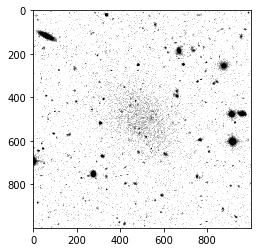

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from deepscan.deepscan import DeepScan
from deepscan import remote_data
#from deepscan import SB
import pandas as pd
from astropy.nddata import Cutout2D

ps = 0.186
mzero = 30

data = remote_data.get()
fig, ax = plt.subplots()
ax.imshow(np.arcsinh(data), cmap="binary", vmin=0.5, vmax=3)

In [73]:
class EllipseBBox():
    """
    Outputs a stamp for each source detected in an image
    """

    def __init__(self, data, ps, mzero, SBthresh):
        """
        Applies DeepScan algorithm to "data" and retrieves the values for each source detected
        --------------
        Input:
        data = 2D float array / image 

        ps = float / pixel scale [arcsec per pixel] 

        mzero = float / magnitude zero point

        SBthresh = float / threshold for the minimum surface brightness of the sources to be detected
        """ 

        # running DeepScan
        result = DeepScan(data)
        df = result["df"]

        # excluding data bellow a certain surface brightness threshold
        df["SB"] = self._SB(df["flux"].values, df["area"].values, ps, mzero)
        df = df[df["SB"] >= SBthresh]
        df.reset_index(inplace=True)
        print(df.iloc[166,:])
        # test UDG
        UDG_test_id = df["area"].idxmax()

        # variables to be used for finding the size of each source's stamp
        x = df["xcen"].values
        y = df["ycen"].values
        major = df["a_rms"].values
        minor = df["b_rms"].values
        angle = df["theta"].values

        # apply _get_ellipse_bb, outputs new df with the padding already considered
        min_x, min_y, max_x, max_y = self._get_ellipse_bb(x, y, major, minor, angle)
        box_df = pd.DataFrame({"min_x": min_x, "min_y": min_y, "max_x": max_x, "max_y": max_y, "xcen": x, "ycen": y})
        print(box_df)
        # test UDG
        UDG_test = box_df.iloc[UDG_test_id,:] # the object with biggest area should be the UDG on the center of the img
        print(UDG_test)

        # apply _crop, outputs images (first print, if its working output them to a directory)
        stamp = self._crop(data, UDG_test)
        type(stamp)
        print(stamp)
        #plt.imshow(np.arcsinh(stamp.data), cmap="binary", vmin=0.5, vmax=3, origin='lower')
        plt.imshow(data, cmap="binary", vmin=0.5, vmax=3, origin='lower')
        stamp.plot_on_original(color='red')


    def _SB(self, flux, area, ps, mzero):
        """
        Computes the Surface Brightness
        """
        area_arcsec = area*ps*ps
        return -2.5*np.log10(flux) + 2.5*np.log10(area_arcsec) + mzero


    def _get_ellipse_bb(self, x, y, major, minor, angle_deg):
        """
        Get the bounding box coordinates. From https://gist.github.com/smidm/b398312a13f60c24449a2c7533877dc0
        """
        t = np.arctan(-minor / 2 * np.tan(np.radians(angle_deg)) / (major / 2))
        [max_x, min_x] = [x + major / 2 * np.cos(t) * np.cos(np.radians(angle_deg)) - minor / 2 * np.sin(t) * np.sin(np.radians(angle_deg)) for t in (t, t + np.pi)]
    
        t = np.arctan(minor / 2 * 1. / np.tan(np.radians(angle_deg)) / (major / 2))
        [max_y, min_y] = [y + minor / 2 * np.sin(t) * np.cos(np.radians(angle_deg)) + major / 2 * np.cos(t) * np.sin(np.radians(angle_deg)) for t in (t, t + np.pi)]
    
        return min_x, min_y, max_x, max_y


    def _crop(self, data, box_df): # crop "data" according to the positions, should output individual images
        """
        Crops the image into stamps of each source in the DataFrame box_df
        """
        center_pos = (box_df["xcen"], box_df["ycen"])

        size = np.linalg.norm(box_df["max_x"] - box_df["min_x"]) * 4 # its gonna be a square, so we just need this once have to find a way of cropping .fits data 
        
        cutout = Cutout2D(data, center_pos, (size,size), copy=True) 

        return cutout

skymap: measuring sky...
-Performing interpolation.
skymap: finished after 0 seconds.
dbscan: performing clustering...
-threshold applied in 0 seconds
-corepoints obtained in 0 seconds
-dilated segments obtained in 0 seconds.
-segments labeled in 0 seconds.
-segmap eroded in 0 seconds
dbscan: finished after 0 seconds.
deblend: deblending...
-Final number of segments: 703
deblend: finished after 0 seconds.
makecat: performing measurements...
makecat: finished after 0 seconds.
index         192.000000
a_rms          92.603975
b_rms          63.559037
theta           2.287861
q               0.686353
xcen          499.457699
ycen          501.226565
segID         193.000000
flux        37451.840044
area        64299.000000
I50             1.035902
I50av           1.382557
R50            65.662070
parentID        0.000000
SB             26.934392
Name: 166, dtype: float64
          min_x       min_y       max_x       max_y        xcen        ycen
0     81.395313    5.687715   83.292621    

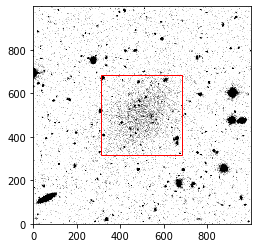

In [74]:
x = EllipseBBox(data, ps, mzero, 26)
x

In [51]:
xcen = (np.linalg.norm(545.740169-453.175230) + 453.175230)/2
ycen = (np.linalg.norm(533.034502-469.418628) + 469.418628)/2
print(xcen,ycen)

size = (545.740169 - xcen)*2
size

272.8700845 266.517251


545.740169

In [33]:
x = {"toi": [1,2,3], "kui": [3,8,7]}
x = pd.DataFrame(x)
x["kui"].idxmax()

1

In [74]:
df = result["df"]


magnitude = _m(df["flux"].values, ps, mzero)
df = df[df["flux"] >= mthresh]
df.reset_index(inplace=True)

NameError: name '_m' is not defined